# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 4
Due Wednesday, February 14

### Problem 1

(from **Insight**, P6.1.10)

Write a program that generates $n=10$ real numbers selected randomly and
uniformly distributed from the set
$\{x : 0 < x < 2\text{ or }7 < x < 10\}$.

In [1]:
using Random

function generate_random_numbers(n)
    numbers = Float64[]
    for i = 1:n
        if rand() < 0.5
            push!(numbers, 2 * rand())  # 0 < x < 2
        else
            push!(numbers, 7 + 3 * rand())  # 7 < x < 10
        end
    end
    return numbers
end

# 使用函数生成10个随机数
random_numbers = generate_random_numbers(10)

10-element Vector{Float64}:
 9.875660984937534
 9.751929579289932
 0.3672428834396997
 7.3537478670562795
 1.743826341288191
 0.41311783393715507
 7.26368987444299
 1.0653293009477869
 9.43018684840523
 1.076685539712921

### Problem 2

(from **Insight**, P6.1.12)

Assume that the coefficients of the quadratic $a x^2 + bx + c$ are selected from the uniform
distribution on $(−2, 2)$. Use the Monte Carlo method to determine the probability of complex roots. What if the coefficients are generated with `randn` with mean $\mu=0$ and standard deviation $\sigma = 0.4$?

In [2]:
using Random

function estimate_complex_roots(trials)
    count = 0
    for i = 1:trials
        a = 4 * rand() - 2
        b = 4 * rand() - 2
        c = 4 * rand() - 2
        if b^2 - 4*a*c < 0
            count += 1
        end
    end
    return count / trials
end

# 从均匀分布中生成系数
probability_uniform = estimate_complex_roots(1000000)

# 使用 randn 生成系数
function estimate_complex_roots_randn(trials)
    count = 0
    for i = 1:trials
        a = 0.4 * randn()
        b = 0.4 * randn()
        c = 0.4 * randn()
        if b^2 - 4*a*c < 0
            count += 1
        end
    end
    return count / trials
end

probability_normal = estimate_complex_roots_randn(1000000)


0.351594

### Problem 3

(from **Insight**, P6.1.15)

Two points on the unit circle are randomly selected. Use the Monte Carlo method to determine the probability that the length of the connecting chord is greater than 1.

In [3]:
using Random

function estimate_chord_length(trials)
    count = 0
    for i = 1:trials
        theta1 = 2*pi*rand()
        theta2 = 2*pi*rand()
        chord_length = sqrt(2 - 2*cos(theta1 - theta2))
        if chord_length > 1
            count += 1
        end
    end
    return count / trials
end

# 使用蒙特卡洛方法估计弦长大于1的概率
probability_chord = estimate_chord_length(1000000)


0.666036

### Problem 4

(from **Insight**, P6.1.19a)

Write a function `ProbG(L,R)` that returns an estimate of the area under the function

$$
f(x) =  \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

from $L$ to $R$ using Monte Carlo. Assume $L < R$. *Hint*: Throw darts in the rectangle having
vertices $(L, 0)$, $(R, 0)$, $(R, 1)$, and $(L, 1)$ and count how many are under the curve.

In [4]:
using Random

function ProbG(L, R, trials=100000)
    count = 0
    for i = 1:trials
        x = L + (R - L) * rand()
        y = rand()
        if y < exp(-x^2 / 2) / sqrt(2π)
            count += 1
        end
    end
    return (count / trials) * (R - L)
end

# 测试函数
area_estimate = ProbG(0, 2)


0.4795

Test the function using $L=0$ and $R=2$:

### Problem 5

(from **Insight**, P6.2.5)

Consider the random walk function `random_walk(n)` from the lecture slides.

We conjecture that the walker is more likely to exit near the middle of an edge than near a
corner. Produce a bar plot that sheds light on this conjecture, for `n=20` and a large number of trials. 

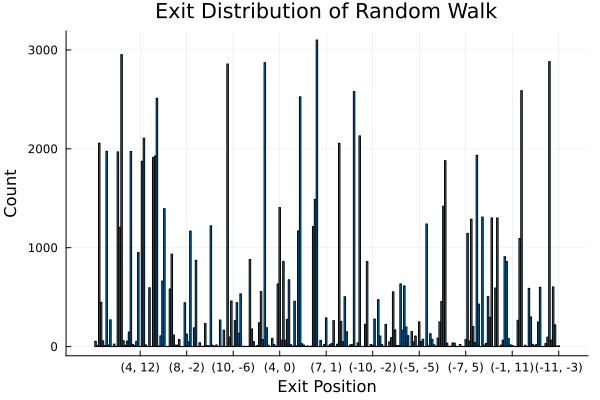

In [5]:
using Plots

function random_walk(n)
    x, y = 0, 0
    path = [(x, y)]
    for i in 1:n
        direction = rand(1:4)
        if direction == 1
            x += 1
        elseif direction == 2
            x -= 1
        elseif direction == 3
            y += 1
        else
            y -= 1
        end
        push!(path, (x, y))
    end
    return path
end

function simulate_walks(n, trials)
    exit_counts = Dict()
    for _ = 1:trials
        walk = random_walk(n)
        exit_point = walk[end]
        exit_counts[exit_point] = get(exit_counts, exit_point, 0) + 1
    end
    return exit_counts
end

# 设置参数
n = 20
trials = 100000

# 模拟随机漫步并统计退出位置
exit_distribution = simulate_walks(n, trials)

# 绘制条形图
bar([string(k) for k in keys(exit_distribution)], [v for v in values(exit_distribution)], legend=false, xlabel="Exit Position", ylabel="Count", title="Exit Distribution of Random Walk")


### Problem 6

Use Monte Carlo simulation with one million trials to estimate the probability that a random poker hand contains two pairs (that is, two of each of two different ranks and a fifth card of a third rank).

In [6]:
using Random

function two_pairs_hand(trials)
    count = 0
    for _ in 1:trials
        deck = shuffle(vcat([[rank, suit] for rank in 1:13, suit in 1:4]...))
        hand = deck[1:5]
        ranks = [card[1] for card in hand]
        unique_ranks = unique(ranks)
        if length(unique_ranks) == 3 && any(count(x -> x == 2, ranks) == 2 for rank in unique_ranks)
            count += 1
        end
    end
    return count / trials
end

# 使用一百万次试验来估计有两对的概率
probability_two_pairs = two_pairs_hand(1000000)


LoadError: MethodError: objects of type Int64 are not callable
Maybe you forgot to use an operator such as [36m*, ^, %, / etc. [39m?

In [ ]:
# ，我们需要使用蒙特卡洛模拟来估计一副扑克牌中抽取到包含两对的五张牌的概率

In [13]:
using Random

function is_two_pairs(hand)
    ranks = [card[1] for card in hand]
    unique_ranks = unique(ranks)
    if length(unique_ranks) == 3
        counts = [count(==(r), ranks) for r in unique_ranks]
        return sort(counts) == [1, 2, 2]
    end
    return false
end

function simulate_two_pairs(trials)
    count = 0
    deck = [rank * suit for rank in 1:13, suit in 1:4]
    for _ = 1:trials
        shuffle!(deck)
        hand = deck[1:5]
        if is_two_pairs(hand)
            count += 1
        end
    end
    return count / trials
end

# 使用一百万次试验来估计有两对的概率
probability_two_pairs = simulate_two_pairs(1_000_000)
println("Probability of two pairs in a poker hand: $(probability_two_pairs)")

# is_two_pairs(hand): 这个函数接收一手牌，计算牌的种类（rank），并判断这五张牌中是否恰好有两对。
# 我们首先将手中的牌映射到它们的种类（rank）。
# unique_ranks 获取所有不重复的种类。
# 如果这些不重复的种类正好有三种，我们继续检查各种类的计数是否为 [1, 2, 2]，即两个2和一个1。
# simulate_two_pairs(trials): 这个函数进行指定次数的模拟。
# 创建一副牌，然后在每次试验中洗牌并抽取前五张牌作为一手牌。
# 检查这手牌是否有两对，如果有则增加计数。
# 最后，计算具有两对的手牌出现的概率，并输出结果。

Probability of two pairs in a poker hand: 0.005331


### Problem 7

Use array functions and vectorization to solve the problems below using *only a single line of code* for each problem.

In [1]:
A = reshape((-22:22) .% 11, 9, 5)          # For testing

9×5 Matrix{Int64}:
   0   -2  -4   5   3
 -10   -1  -3   6   4
  -9    0  -2   7   5
  -8  -10  -1   8   6
  -7   -9   0   9   7
  -6   -8   1  10   8
  -5   -7   2   0   9
  -4   -6   3   1  10
  -3   -5   4   2   0

### Problem 7(a)

Count the number of elements $a$ of $A$ that satisfy $a^2<10$.

In [8]:
# 问题7(a)

A = reshape((-22:22) .% 11, 9, 5)  # 创建矩阵A
count_a = count(x -> x^2 < 10, A)  # 计算符合条件的元素数量

17

### Problem 7(b)

Create a matrix which contains only the columns $j$ of $A$ where the first element $A_{1,j} \ge 0$.

In [9]:

# 问题7(b)
B = A[:, A[1, :] .>= 0]  # 仅包含第一行元素非负的列


9×3 Matrix{Int64}:
   0   5   3
 -10   6   4
  -9   7   5
  -8   8   6
  -7   9   7
  -6  10   8
  -5   0   9
  -4   1  10
  -3   2   0

### Problem 7(c)

Modify $A$ in the following way: Multiply all the elements that are even by 3 (you might need to print $A$ on a separate line to see the full matrix):

In [10]:
# 问题7(c)
A_modified = A .* ((A .% 2 .== 0) * 2 + 1)  # 将偶数元素乘以3

LoadError: MethodError: no method matching +(::Matrix{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:578[24m[39m
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
[0m[90m   @[39m [90mBase[39m [90m[4mint.jl:87[24m[39m
[0m  +([91m::Base.TwicePrecision[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mtwiceprecision.jl:290[24m[39m
[0m  ...


当你想对数组的每个元素进行运算时，需要使用广播操作符 .。
我之前给出的代码中的加法没有使用广播操作符，这导致了错误。



In [11]:
# 问题7(c)
# 先判断A中的元素是否为偶数，然后使用广播乘以3或1
A_modified = A .* ((A .% 2 .== 0) * 3 .+ (A .% 2 .!= 0) * 1)


9×5 Matrix{Int64}:
   0   -6  -12   5   3
 -30   -1   -3  18  12
  -9    0   -6   7   5
 -24  -30   -1  24  18
  -7   -9    0   9   7
 -18  -24    1  30  24
  -5   -7    6   0   9
 -12  -18    3   1  30
  -3   -5   12   6   0